In [ ]:
import shutil
import os

folder_path = "/content/CVProject"

# Check if folder exists
if os.path.exists(folder_path):
    # Delete folder and all its contents
    shutil.rmtree(folder_path)
    print(f"Deleted folder: {folder_path}")
else:
    print("Folder does not exist")


Folder does not exist


In [ ]:

# --- Step 2: Unzip your project (code) folder uploaded to Colab ---
# Assuming you uploaded "CVProject.zip" manually via the Colab file sidebar
!unzip -q "/content/CVProject_recent.zip" -d "/content/"


In [ ]:
import shutil

source = "/content/content/CVProject"
destination = "/content/"

shutil.move(source, destination)


'/content/CVProject'

In [ ]:
# --- Step 1: Mount Google Drive ---
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# --- Step 3: Unzip your dataset from Google Drive ---
# Adjust the path below if your zip is located elsewhere in Drive
# Ensure dataset folder exists first
!mkdir -p "dataset/puzzle1000"

!unzip -q "drive/MyDrive/puzzle1000.zip" -d "dataset/puzzle1000"


Mounted at /content/drive


In [ ]:

# --- Step 4: (Optional) Check folder structure to confirm everything extracted correctly ---
!echo "Project files:" && ls /content/CVProject
!echo "Dataset folders:" && ls /content/dataset/puzzle1000

# --- Step 5: Change directory into your project folder (for running scripts) ---
%cd /content/CVProject

Project files:
code		     PROJECT_OVERVIEW.md  README.md	    results.csv  run.sh
CV-Project-2025.pdf  __pycache__	  requirements.txt  run.bat
Dataset folders:
images	masks
/content/CVProject


In [ ]:
!pip install -q numpy opencv-python pillow scikit-image scipy scikit-learn tqdm

In [ ]:
%cd code

/content/CVProject/code


In [ ]:
# one-time installs (fast on Colab)
!pip install -q opencv-python-headless matplotlib tqdm

In [ ]:
!python segment.py

Found 500 matched image-mask pairs.
Split: 425 train, 75 val
Device: cuda
Start training for 30 epochs. Best checkpoint -> models/unet_best.pth
[Epoch 1] train_loss=0.3843 train_iou=0.0000 | val_loss=0.1816 val_iou=0.0000
 🟢 New best val_iou=0.0000 -> saved checkpoint
[Epoch 2] train_loss=0.1615 train_iou=0.0240 | val_loss=0.0923 val_iou=0.3057
 🟢 New best val_iou=0.3057 -> saved checkpoint
[Epoch 3] train_loss=0.0953 train_iou=0.5784 | val_loss=0.0711 val_iou=0.6796
 🟢 New best val_iou=0.6796 -> saved checkpoint
[Epoch 4] train_loss=0.0594 train_iou=0.6970 | val_loss=0.0324 val_iou=0.8209
 🟢 New best val_iou=0.8209 -> saved checkpoint
[Epoch 5] train_loss=0.0534 train_iou=0.7584 | val_loss=0.0260 val_iou=0.8685
 🟢 New best val_iou=0.8685 -> saved checkpoint
[Epoch 6] train_loss=0.0332 train_iou=0.8152 | val_loss=0.0224 val_iou=0.8750
 🟢 New best val_iou=0.8750 -> saved checkpoint
[Epoch 7] train_loss=0.0291 train_iou=0.8388 | val_loss=0.0179 val_iou=0.8916
 🟢 New best val_iou=0.8916 -

In [ ]:
folder_path = "dataset/puzzle1000/pred_masks"

# Check if folder exists
if os.path.exists(folder_path):
    # Delete folder and all its contents
    shutil.rmtree(folder_path)
    print(f"Deleted folder: {folder_path}")
else:
    print("Folder does not exist")


Deleted folder: dataset/puzzle1000/pred_masks


In [ ]:
!python CVProject/code/inference.py

Using device: cuda
UNet imported from segment.py
Loading checkpoint: CVProject/code/models/unet_best.pth
Checkpoint keys (sample): ['d1.net.0.weight', 'd1.net.0.bias', 'd1.net.2.weight', 'd1.net.2.bias', 'd2.net.0.weight', 'd2.net.0.bias', 'd2.net.2.weight', 'd2.net.2.bias', 'd3.net.0.weight', 'd3.net.0.bias', 'd3.net.2.weight', 'd3.net.2.bias']
Model total params: 31031810
Predicting: 100% 500/500 [02:06<00:00,  3.94it/s]

Inference summary:
  Total images to predict: 500
  Predicted and wrote masks: 500
  Failed reads/saves: 0
  Example predicted masks: ['IMG_20200328_131738', 'IMG_20200328_131748', 'IMG_20200328_131831', 'IMG_20200328_131843', 'IMG_20200328_131903', 'IMG_20200328_131925', 'IMG_20200328_131935', 'IMG_20200328_132009', 'IMG_20200328_132018', 'IMG_20200328_132029']


Found 500 predicted masks


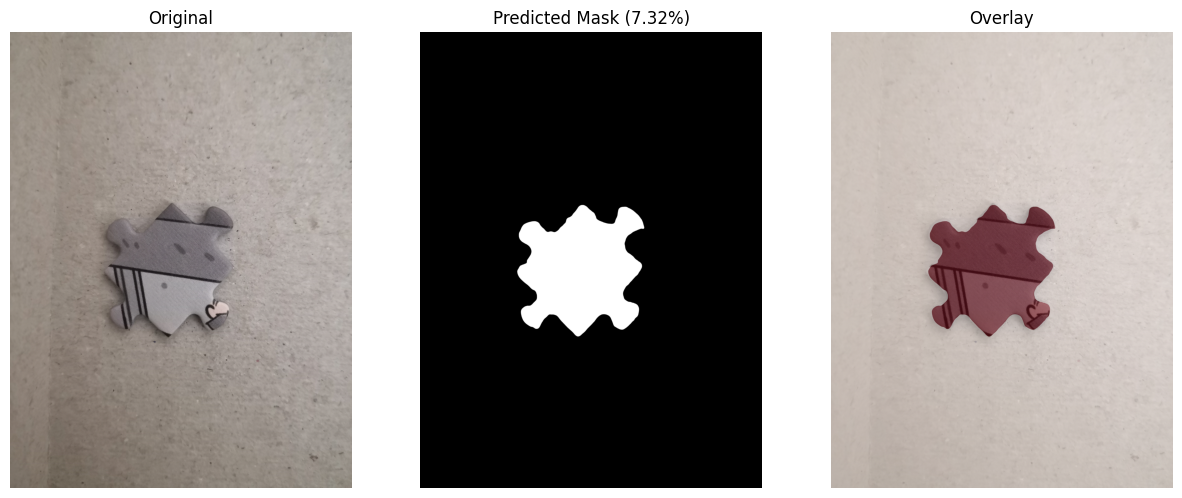

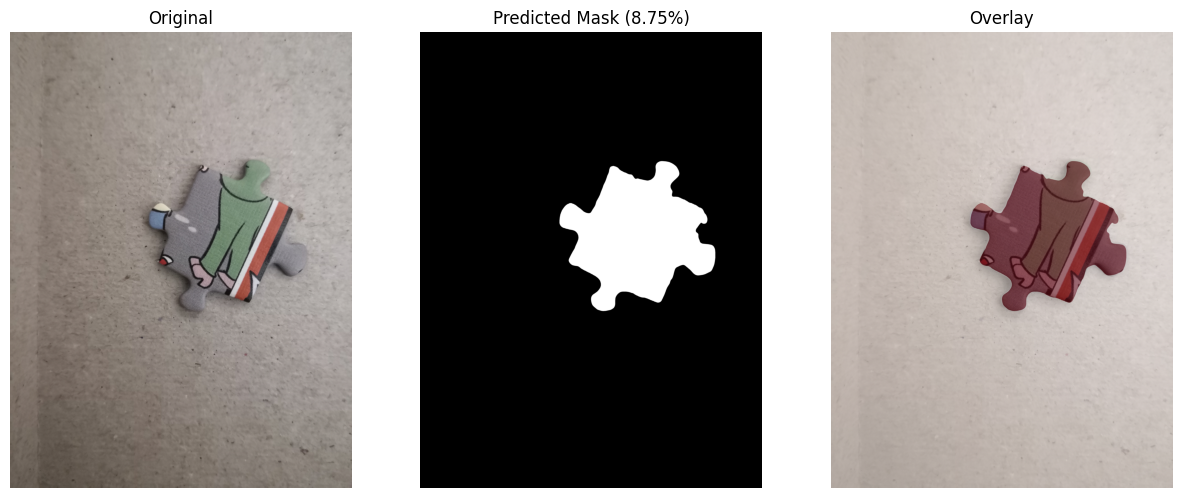

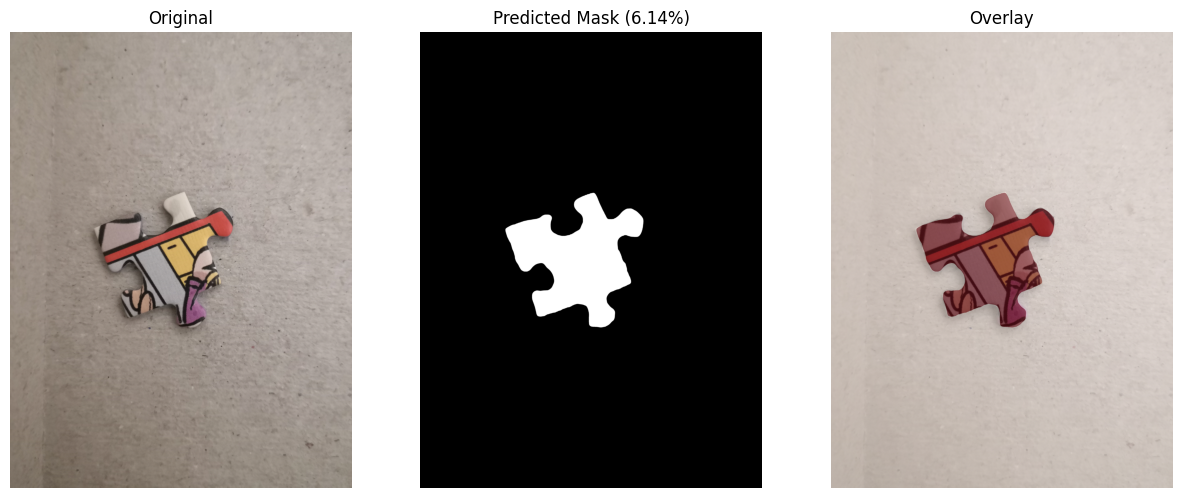

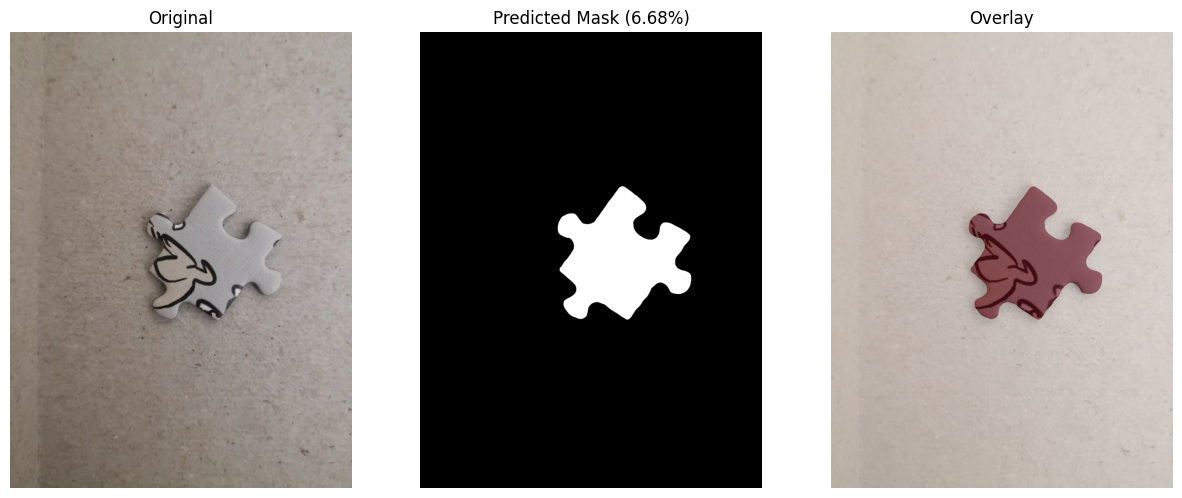

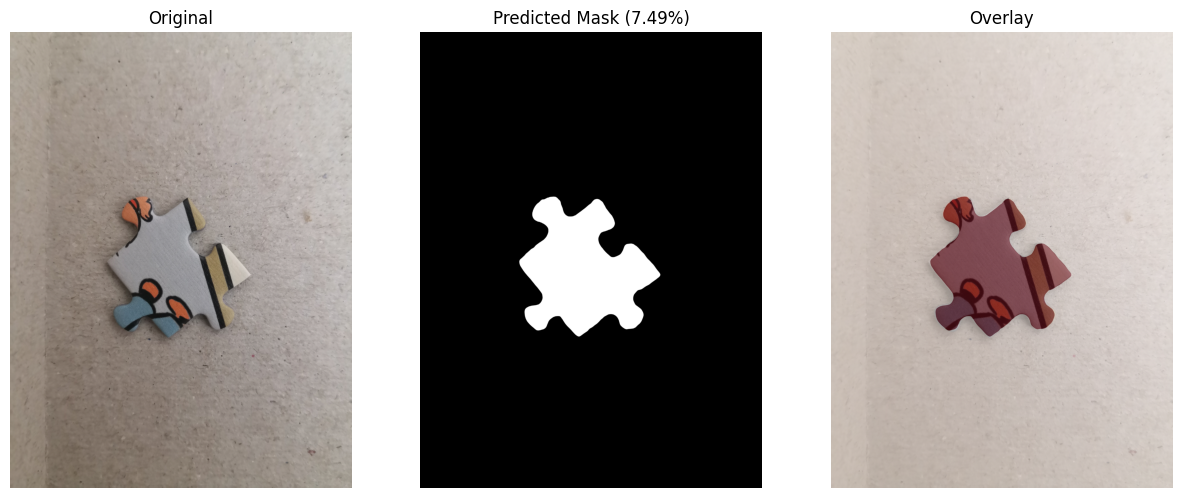

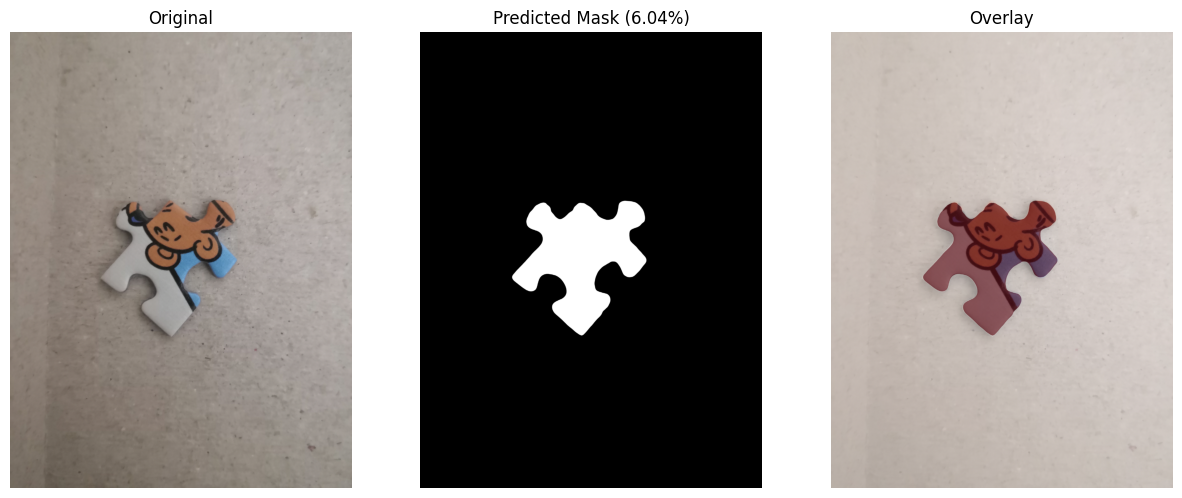

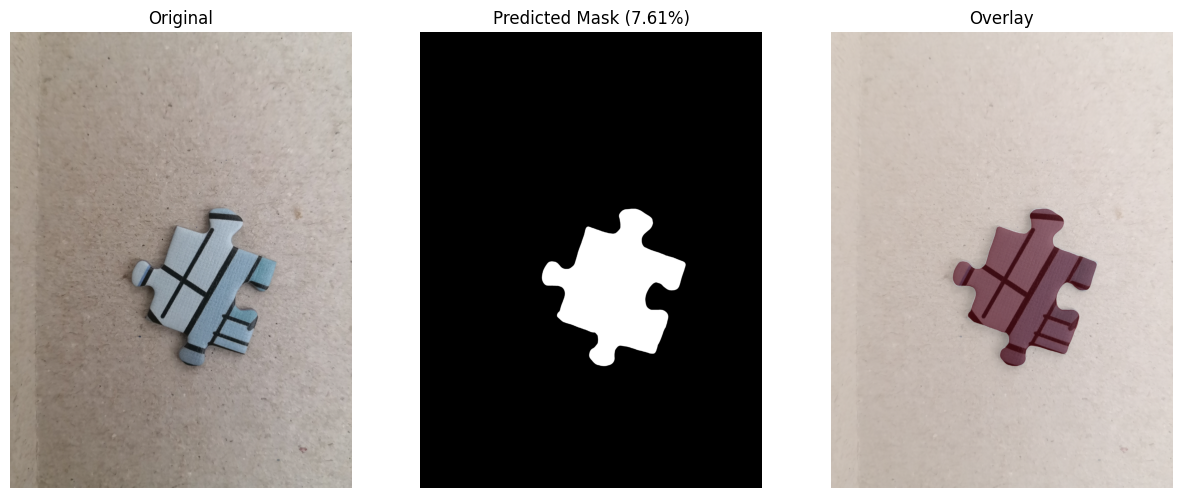

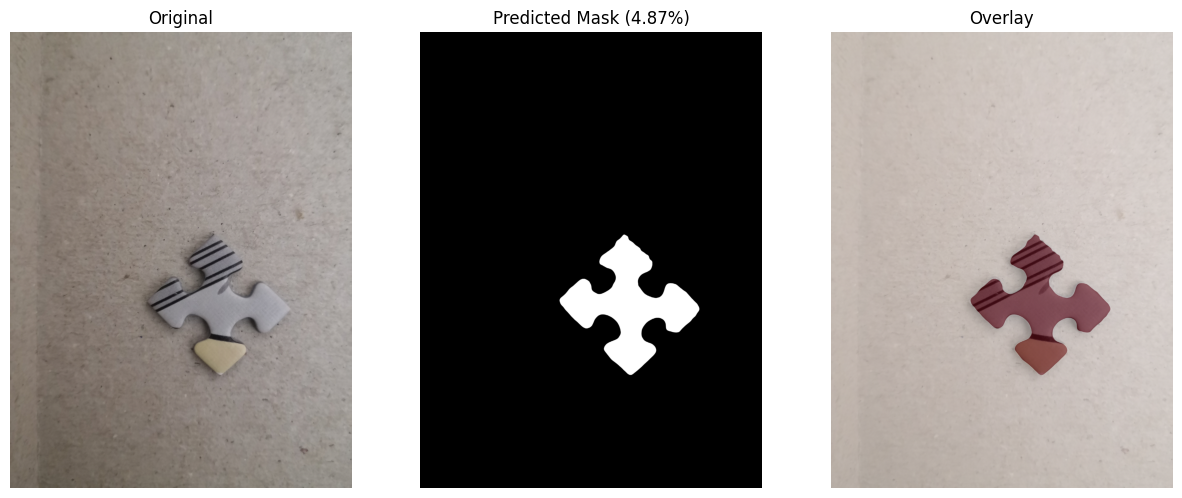

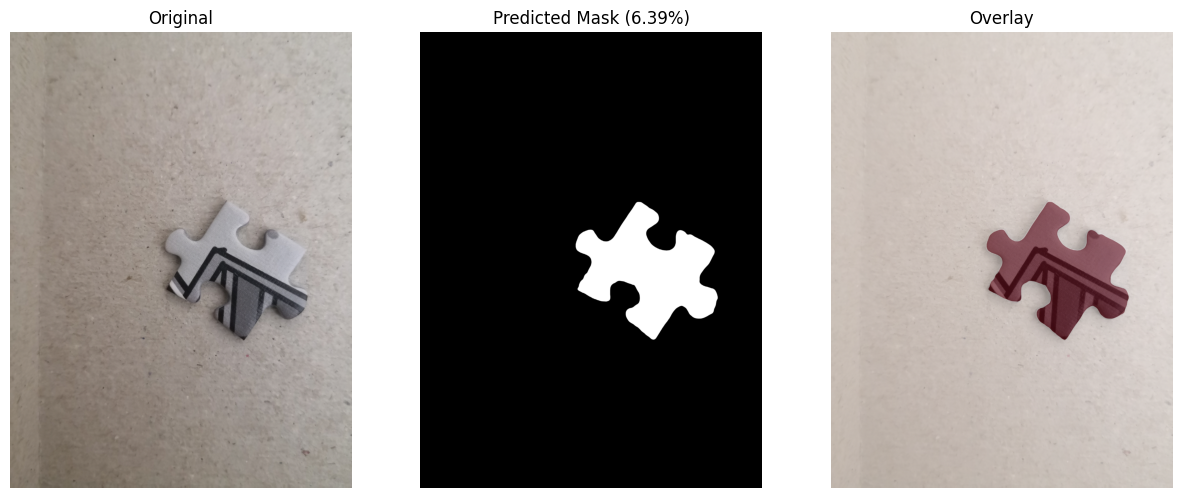

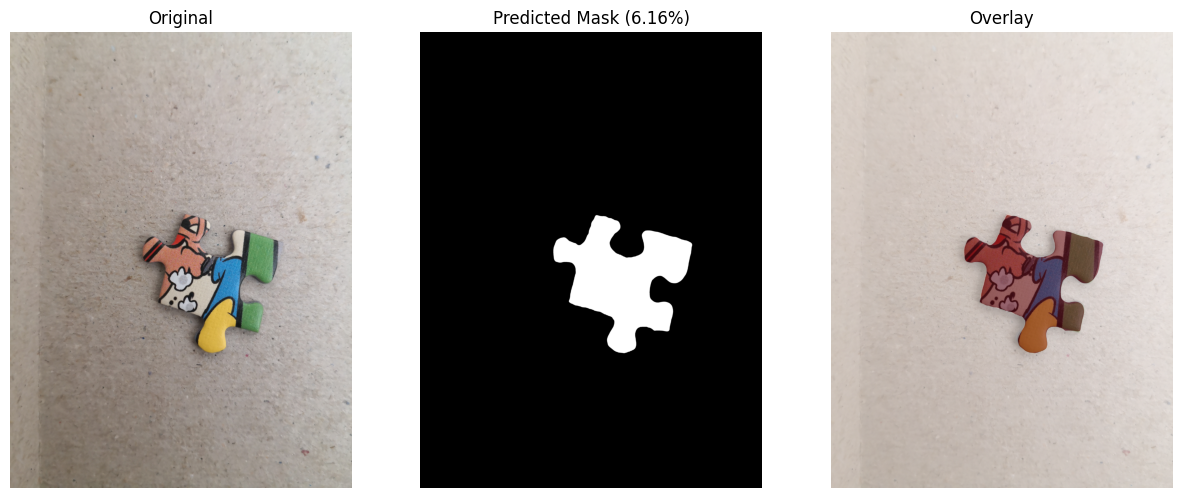

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os, random

# Paths
img_dir = "dataset/puzzle1000/images"
mask_dir = "dataset/puzzle1000/pred_masks"

# Get only images that have a matching predicted mask
mask_files = sorted([f for f in os.listdir(mask_dir) if f.endswith("_mask.png")])
print(f"Found {len(mask_files)} predicted masks")

# Pick N random samples
N = 10
sample_masks = random.sample(mask_files, min(N, len(mask_files)))

for mask_name in sample_masks:
    # derive image name (remove "_mask" suffix)
    base_name = mask_name.replace("_mask.png", "")
    img_path = os.path.join(img_dir, base_name + ".jpg")
    mask_path = os.path.join(mask_dir, mask_name)

    if not os.path.exists(img_path):
        print(f"⚠️ Missing image for {mask_name}")
        continue

    # Load image and mask
    im = np.array(Image.open(img_path).convert("RGB"))
    m = np.array(Image.open(mask_path).convert("L")).astype(np.uint8)
    m_bin = (m > 0).astype(np.uint8)
    coverage = 100 * m_bin.sum() / m_bin.size

    # Display
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(im)
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(m, cmap="gray")
    plt.title(f"Predicted Mask ({coverage:.2f}%)")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(im)
    plt.imshow(m, cmap="Reds", alpha=0.5)
    plt.title("Overlay")
    plt.axis("off")

    plt.show()


In [ ]:
from PIL import Image
import numpy as np
import os, random

mask_dir = "dataset/puzzle1000/pred_masks"

mask_files = sorted([f for f in os.listdir(mask_dir) if f.endswith("_mask.png")])
print(f"Found {len(mask_files)} predicted masks")

sample_masks = random.sample(mask_files, min(10, len(mask_files)))

for fname in sample_masks:
    path = os.path.join(mask_dir, fname)
    m = np.array(Image.open(path).convert("L")).astype(np.uint8)
    uniques = np.unique(m)
    coverage = 100 * (m > 0).sum() / m.size

    print(f"{fname}: unique={uniques}, coverage={coverage:.4f}%")


Found 500 predicted masks
IMG_20200328_140442_mask.png: unique=[0 1], coverage=6.4893%
IMG_20200328_161204_mask.png: unique=[0 1], coverage=5.8344%
IMG_20200328_143112_mask.png: unique=[0 1], coverage=5.4408%
IMG_20200328_145755_mask.png: unique=[0 1], coverage=5.7241%
IMG_20200328_151739_mask.png: unique=[0 1], coverage=7.2842%
IMG_20200328_160345_mask.png: unique=[0 1], coverage=5.5884%
IMG_20200328_154533_mask.png: unique=[0 1], coverage=7.7583%
IMG_20200328_161353_mask.png: unique=[0 1], coverage=6.1664%
IMG_20200328_152420_mask.png: unique=[0 1], coverage=5.9714%
IMG_20200328_152654_mask.png: unique=[0 1], coverage=6.7190%


In [ ]:
!python extract_features.py

Starting feature extraction (no crops)...
Images dir: /content/dataset/puzzle1000/images
Mask dirs: ['/content/dataset/puzzle1000/pred_masks']
Output features file: outputs/test_features.pkl
Mask filter: pred
Found 1000 image files in '/content/dataset/puzzle1000/images'
  sample images: ['IMG_20200328_131658', 'IMG_20200328_131710', 'IMG_20200328_131720', 'IMG_20200328_131729', 'IMG_20200328_131738', 'IMG_20200328_131748']
[/content/dataset/puzzle1000/pred_masks] Found 500 mask files
  sample masks: ['IMG_20200328_131738_mask', 'IMG_20200328_131748_mask', 'IMG_20200328_131831_mask', 'IMG_20200328_131843_mask', 'IMG_20200328_131903_mask', 'IMG_20200328_131925_mask']
[/content/dataset/puzzle1000/pred_masks] Found 500 image-mask pairs to process (common stems)
[/content/dataset/puzzle1000/pred_masks] processed 50/500 pairs
[/content/dataset/puzzle1000/pred_masks] processed 100/500 pairs
[/content/dataset/puzzle1000/pred_masks] processed 150/500 pairs
[/content/dataset/puzzle1000/pred_mas

In [ ]:
!python embeddings.py --input outputs/test_features.pkl --output outputs/features_emb.pkl --n_components 16

Saved features with embeddings to: outputs/features_emb.pkl
Meta: {'pca_components': 16, 'pca_explained_ratio': [0.15556398034095764, 0.10294462740421295, 0.032388221472501755, 0.02525828406214714, 0.02431652322411537, 0.02151389792561531, 0.02034621313214302, 0.01953374594449997, 0.018971633166074753, 0.0179758220911026, 0.017372723668813705, 0.01657162979245186, 0.01608297973871231, 0.015644602477550507, 0.015311653725802898, 0.015139216557145119]}


In [ ]:
!python matching.py

In [ ]:
!python build_graph.py \
    --features outputs/features_emb.pkl \
    --threshold 0.45 \
    --top_k 4


Loading features from: outputs/features_emb.pkl
Loaded features for 500 pieces
Computing matches for 500 pieces (top_k=4, threshold=0.45, use_adaptive=False)
  matched 50/500 pieces
  matched 100/500 pieces
  matched 150/500 pieces
  matched 200/500 pieces
  matched 250/500 pieces
  matched 300/500 pieces
  matched 350/500 pieces
  matched 400/500 pieces
  matched 450/500 pieces
  matched 500/500 pieces
Total candidate matches before reciprocity filtering: 7948
Matching completed in 562.3s. Found 1588 reciprocal matches (edges).
Graph: 500 nodes, 1100 undirected edges, 17 connected components
Top component sizes: [484, 1, 1, 1, 1]
Degree: min 0 max 12 mean 4.4
✅ Saved adjacency list to outputs/graph.json
Saved graph (nodes+edges) to outputs/graph.json
Graph summary: {'n_nodes': 500, 'n_edges': 1100, 'n_components': 17, 'component_sizes': [484, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'degrees': [6, 9, 3, 5, 3, 5, 3, 4, 7, 1, 3, 2, 7, 4, 5, 3, 2, 7, 8, 4, 8, 5, 1, 4, 5, 8, 5, 4,

In [ ]:
# inspect_graph_scores.py
import json, sys, numpy as np
p = "outputs/graph.json"  # adjust if your detailed file is different (graph_full.json)
g = json.load(open(p,'r'))
edges = g.get("edges", None)
if edges is None:
    # maybe file is adjacency list; then nothing to inspect
    print("No 'edges' field found in JSON; provide the detailed graph (nodes+edges).")
    sys.exit(1)
scores = np.array([e.get("score",0.0) for e in edges])
print("Edges total:", len(scores))
print("Score min/max/mean:", scores.min(), scores.max(), scores.mean())
for thr in [0.2, 0.25, 0.30, 0.35, 0.4, 0.5]:
    keep = (scores >= thr).sum()
    print(f" >={thr:.2f}: {keep} edges ({100*keep/len(scores):.1f}%)")
# quick histogram buckets
hist, bins = np.histogram(scores, bins=20, range=(0,1))
for i in range(len(hist)):
    print(f"{bins[i]:.2f}-{bins[i+1]:.2f}: {hist[i]}")

Edges total: 1388
Score min/max/mean: 0.4743428517693776 0.7379332444430473 0.6501347218598668
 >=0.20: 1388 edges (100.0%)
 >=0.25: 1388 edges (100.0%)
 >=0.30: 1388 edges (100.0%)
 >=0.35: 1388 edges (100.0%)
 >=0.40: 1388 edges (100.0%)
 >=0.50: 1386 edges (99.9%)
0.00-0.05: 0
0.05-0.10: 0
0.10-0.15: 0
0.15-0.20: 0
0.20-0.25: 0
0.25-0.30: 0
0.30-0.35: 0
0.35-0.40: 0
0.40-0.45: 0
0.45-0.50: 2
0.50-0.55: 21
0.55-0.60: 104
0.60-0.65: 452
0.65-0.70: 742
0.70-0.75: 67
0.75-0.80: 0
0.80-0.85: 0
0.85-0.90: 0
0.90-0.95: 0
0.95-1.00: 0


In [ ]:
folder_path = "/content/CVProject/code/outputs/visuals"

# Check if folder exists
if os.path.exists(folder_path):
    # Delete folder and all its contents
    shutil.rmtree(folder_path)
    print(f"Deleted folder: {folder_path}")
else:
    print("Folder does not exist")

Deleted folder: /content/CVProject/code/outputs/visuals


In [ ]:
!python visualize_graph.py --graph outputs/graph.json --features outputs/features_emb.pkl --out_dir outputs/visuals --overlay_matches 5

Loading graph: outputs/graph.json
Loading features: outputs/features_emb.pkl
Building NetworkX graph...
Saved overview graph PNG to: outputs/visuals/graph_overview.png
Saved GraphML to: outputs/visuals/graph_export.graphml
Saved GEXF to: outputs/visuals/graph_export.gexf
Saved adjacency_list.json to outputs/visuals/adjacency_list.json
Rendering up to 5 matched overlays (this may create many images)...
 Saved overlay 1/5 -> outputs/visuals/match_0000_img_20200328_140107_e0_vs_img_20200328_140804_e0.jpg
 Saved overlay 2/5 -> outputs/visuals/match_0001_img_20200328_140107_e0_vs_img_20200328_153437_e0.jpg
 Saved overlay 3/5 -> outputs/visuals/match_0002_img_20200328_154524_e0_vs_img_20200328_161005_e0.jpg
 Saved overlay 4/5 -> outputs/visuals/match_0003_img_20200328_132503_e2_vs_img_20200328_154752_e2.jpg
 Saved overlay 5/5 -> outputs/visuals/match_0004_img_20200328_154752_e1_vs_img_20200328_132503_e1.jpg
All done. Visuals saved to: outputs/visuals


In [ ]:
!python assemble.py

Loading graph...

Graph statistics:
  Nodes: 1000
  Components: 2
  Top 5 component sizes: [999, 1]
  Isolated pieces: 1
Building image cache from dataset/puzzle1000/cropped_images...
Found 1,028 image files (cache size 2,056)
Using lookup directory: dataset/puzzle1000/cropped_images (cache entries: 2,056)

Processing top 2 components...
Loading images: 100% 2/2 [01:33<00:00, 46.83s/it]

Loaded 1000 images across 2 components
Max tile size (post-downscale): 1913x1912

Tiling components...
(Temporary component canvas dir: /tmp/assembler_tiles_jzr1d1iw)
Creating tiles: 100% 2/2 [10:24<00:00, 312.49s/it]

Estimated final dimensions: 61546 x 63476 = 3,906,693,896 pixels
Estimated final image too large (> 200,000,000 px). Downscaling component canvases by factor 0.226 to fit memory.
New estimated dimensions: 13925 x 14385 = 200,311,125 pixels

Stacking components...
Pasting components: 100% 2/2 [00:00<00:00,  2.08it/s]

✅ Saved assembled image to outputs/final.png
   Dimensions: 13925x14385

In [ ]:
from pathlib import Path
images_dir = Path("/content/dataset/puzzle1000/images")   # the path assemble used
files = list(images_dir.glob("*"))
print("Total files in images_dir:", len(files))
print("Example files:", [p.name for p in files[:20]])

Total files in images_dir: 1000
Example files: ['IMG_20200328_140922.jpg', 'IMG_20200328_162833.jpg', 'IMG_20200328_145301.jpg', 'IMG_20200328_153437.jpg', 'IMG_20200328_140347.jpg', 'IMG_20200328_140821.jpg', 'IMG_20200328_132956.jpg', 'IMG_20200328_152626.jpg', 'IMG_20200328_144903.jpg', 'IMG_20200328_143331.jpg', 'IMG_20200328_142615.jpg', 'IMG_20200328_145039.jpg', 'IMG_20200328_144829.jpg', 'IMG_20200328_144642.jpg', 'IMG_20200328_140234.jpg', 'IMG_20200328_140752.jpg', 'IMG_20200328_131729.jpg', 'IMG_20200328_153557.jpg', 'IMG_20200328_140957.jpg', 'IMG_20200328_131914.jpg']


In [ ]:
import pickle
from pprint import pprint
p = "outputs/test_features.pkl"   # or outputs/features.pkl as you used
with open(p, "rb") as f:
    feats = pickle.load(f)
print("Num pieces:", len(feats))
some = list(feats.keys())[:5]
for k in some:
    print("----", k)
    pprint({kk: type(v).__name__ if kk not in ('edges','curvature') else f"<{len(feats[k]['edges'])} edges>"
            for kk,v in feats[k].items()})
    # if mask saved as ndarray, print shape
    if 'mask' in feats[k]:
        print(" mask shape:", feats[k]['mask'].shape, "mask dtype:", feats[k]['mask'].dtype)
    if 'crop_bbox' in feats[k]:
        print(" crop_bbox:", feats[k]['crop_bbox'])
    if 'image_path' in feats[k]:
        print(" image_path:", feats[k]['image_path'])
    print()

Num pieces: 500
---- img_20200328_131738
{'area': 'float',
 'aspect_ratio': 'float',
 'bbox': 'tuple',
 'center': 'tuple',
 'contour': 'ndarray',
 'edges': '<4 edges>',
 'perimeter': 'float'}

---- img_20200328_131748
{'area': 'float',
 'aspect_ratio': 'float',
 'bbox': 'tuple',
 'center': 'tuple',
 'contour': 'ndarray',
 'edges': '<4 edges>',
 'perimeter': 'float'}

---- img_20200328_131831
{'area': 'float',
 'aspect_ratio': 'float',
 'bbox': 'tuple',
 'center': 'tuple',
 'contour': 'ndarray',
 'edges': '<4 edges>',
 'perimeter': 'float'}

---- img_20200328_131843
{'area': 'float',
 'aspect_ratio': 'float',
 'bbox': 'tuple',
 'center': 'tuple',
 'contour': 'ndarray',
 'edges': '<4 edges>',
 'perimeter': 'float'}

---- img_20200328_131903
{'area': 'float',
 'aspect_ratio': 'float',
 'bbox': 'tuple',
 'center': 'tuple',
 'contour': 'ndarray',
 'edges': '<4 edges>',
 'perimeter': 'float'}



In [ ]:
import numpy as np
masks = []
for k, f in list(feats.items())[:50]:
    if 'mask' in f:
        m = np.array(f['mask'])
        masks.append(m.mean())   # fraction of pixels that are True/255
print("Example foreground fractions:", masks[:20])

Example foreground fractions: []


In [ ]:
folder_path = "/content/CVProject/code/dataset"

# Check if folder exists
if os.path.exists(folder_path):
    # Delete folder and all its contents
    shutil.rmtree(folder_path)
    print(f"Deleted folder: {folder_path}")
else:
    print("Folder does not exist")

Deleted folder: /content/CVProject/code/dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Path to the folder you want to zip
folder_to_zip = "/content/CVProject"

# Output zip file name
output_zip = "/content/CVProject_most_recent.zip"

# Run the zip command
!zip -r {output_zip} {folder_to_zip}


  adding: content/CVProject/ (stored 0%)
  adding: content/CVProject/__pycache__/ (stored 0%)
  adding: content/CVProject/__pycache__/shared_utils.cpython-313.pyc (deflated 43%)
  adding: content/CVProject/__pycache__/shared_utils.cpython-311.pyc (deflated 43%)
  adding: content/CVProject/run.bat (stored 0%)
  adding: content/CVProject/.ipynb_checkpoints/ (stored 0%)
  adding: content/CVProject/run.sh (deflated 52%)
  adding: content/CVProject/CV-Project-2025.pdf (deflated 4%)
  adding: content/CVProject/code/ (stored 0%)
  adding: content/CVProject/code/inspect.py (deflated 62%)
  adding: content/CVProject/code/matching.py (deflated 73%)
  adding: content/CVProject/code/metrics.csv (deflated 93%)
  adding: content/CVProject/code/__init__.py (stored 0%)
  adding: content/CVProject/code/assemble.py (deflated 71%)
  adding: content/CVProject/code/__pycache__/ (stored 0%)
  adding: content/CVProject/code/__pycache__/segment.cpython-312.pyc (deflated 55%)
  adding: content/CVProject/code/_

In [ ]:

# Source and destination paths
source_zip = "/content/CVProject_most_recent.zip"
destination_zip = "/content/drive/MyDrive/CVProject_recent.zip"

# Copy the zip to Drive
shutil.copy(source_zip, destination_zip)

print(f"Zip file saved to {destination_zip}")

Zip file saved to /content/drive/MyDrive/CVProject_recent.zip


In [ ]:
# Zip the entire project folder
!zip -r -q CVProject_updated.zip /content/CVProject
from google.colab import files
files.download("CVProject_updated.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import zipfile
import os

folder = "dataset/puzzle1000/pred_masks".rstrip("/")
print(f"Reading from {folder}/")

mask_files = sorted(os.listdir(folder))

count = 0
with zipfile.ZipFile("archive.zip", "w", zipfile.ZIP_DEFLATED) as zipf:
    for file in mask_files:
        full_path = os.path.join(folder, file)
        if os.path.isfile(full_path):
            zipf.write(full_path, arcname=file)
            count += 1

print(f"Added {count} files to archive.")


Reading from dataset/puzzle1000/pred_masks/
Added 500 files to archive.
